## Post Sentiment Classification Task

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

train_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_train.json")

validation_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_validation.json")

test_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_test.json")

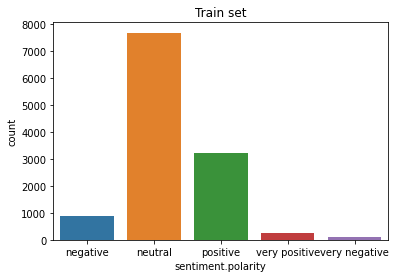

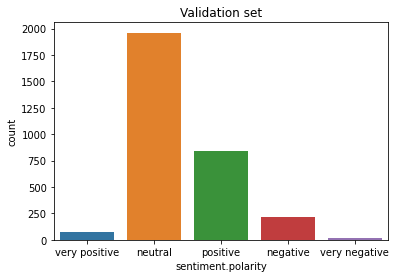

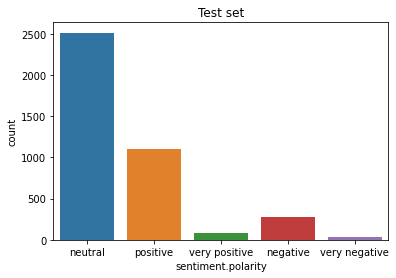

In [2]:
a=0
datasets = [train_data, validation_data, test_data] 
titles = ['Train set','Validation set','Test set']
for i in datasets:
    plt.title(titles[a])
    sns.countplot( x= 'sentiment.polarity', data = i)
    plt.show()
    a+=1

Length of each data set

In [3]:
a= 0 
for i in datasets:
    print('{} contains {} reviews'.format(titles[a],len(i)))
    print('The distribution of reviews are as follows,')
    print(i['sentiment.polarity'].value_counts())
    print('\n')
    a+=1

Train set contains 12138 reviews
The distribution of reviews are as follows,
neutral          7679
positive         3231
negative          878
very positive     253
very negative      97
Name: sentiment.polarity, dtype: int64


Validation set contains 3109 reviews
The distribution of reviews are as follows,
neutral          1961
positive          845
negative          215
very positive      73
very negative      15
Name: sentiment.polarity, dtype: int64


Test set contains 4016 reviews
The distribution of reviews are as follows,
neutral          2514
positive         1102
negative          282
very positive      86
very negative      32
Name: sentiment.polarity, dtype: int64




In [28]:

import spacy

# Load the small english model. 
# Disable the advanced NLP features in the pipeline for efficiency.
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

# Download a stopword list
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
words = set(nltk.corpus.words.words())
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tokenize and Normalize

In [91]:
lemmatizer = WordNetLemmatizer()
#Tokenize
def spacy_tokenize(string):
    tokens = list()
    #string = " ".join(w for w in nltk.wordpunct_tokenize(string) if lemmatizer.lemmatize(w.lower()) in words or not w.isalpha())
    doc = nlp(string)
    for token in doc: 
        tokens.append(token)
    return tokens

#Normalize and Lemmatize
def normalize(tokens):
    normalized_tokens = list()
    for token in tokens:
        normalized = token.text.lower().strip()
        if (token.is_alpha or token.is_digit):
            normalized_tokens.append((normalized))
    return normalized_tokens

#Tokenize and normalize
def tokenize_normalize(string):
    return normalize(spacy_tokenize(string))

In [22]:
train_data['body']

0                        It's a sad realization, isn't it?
1        I told her a couple of minutes ago that I didn...
2                        Leeches don't make good friends. 
3        I just ended it. Apparently she wasn't a good ...
4             Good for you!  Make sure you stick with it. 
                               ...                        
12133    If you were God, you'd know whether we would b...
12134    If I check my account balance in 5 minutes and...
12135    I don't know. Can you heal the sick with a tou...
12136           ... Give LeBron James a championship ring?
12137              Well, if you believed it, that'd be one
Name: body, Length: 12138, dtype: object

In [147]:
tokenize_normalize('bats are FEET 12123')

['bats', 'are', 'feet', '12123']

[]

In [ ]:
train_data

Count Vectorizer One-hot encoding

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

one_hot_vectorizer = CountVectorizer(tokenizer=tokenize_normalize, binary=True)
train_features = one_hot_vectorizer.fit_transform(train_data['body'])

# This creates input features for our classification on all subsets of our collection.
validation_features = one_hot_vectorizer.transform(validation_data['body'])
test_features = one_hot_vectorizer.transform(test_data['body'])

In [86]:
pd.DataFrame(train_features.toarray(), columns = one_hot_vectorizer.get_feature_names())

,0,00,000,0000,00005401,00005402,00005403,00005404,00005405,00005406,...,zipper,zipping,zombie,zone,zoned,zoning,zoo,zoologist,zoology,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Count Vectorizer with TF-IDF vectorizer

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize)

train_features_tfidf = tf_idf_vectorizer.fit_transform(train_data['body'])
validation_features_tfidf = tf_idf_vectorizer.transform(validation_data['body'])
test_features_tfidf = tf_idf_vectorizer.transform(test_data['body'])

In [88]:
pd.DataFrame(train_features_tfidf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,0,00,000,0000,00005401,00005402,00005403,00005404,00005405,00005406,...,zipper,zipping,zombie,zone,zoned,zoning,zoo,zoologist,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_labels = le.fit_transform(train_data['sentiment.polarity'])
validation_labels = le.transform(validation_data['sentiment.polarity'])
test_labels = le.transform(test_data['sentiment.polarity'])

Evaluation Metrics

In [104]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, predictions, true_labels):
    print("Evaluation for: " + description)
    print(classification_report(predictions, true_labels, digits=3, zero_division = 0))
    print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted



Dummy Classifier

In [54]:
from sklearn.dummy import DummyClassifier

In [96]:
dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(train_features, train_labels) 
y_pred = dummy_prior.predict(test_features)
evaluation_summary('Dummy Classifier-Stratified', y_pred,test_labels)

Evaluation for: Dummy Classifier-Stratified
              precision    recall  f1-score   support

           0      0.053     0.051     0.052       297
           1      0.643     0.630     0.636      2566
           2      0.261     0.282     0.271      1020
           3      0.000     0.000     0.000        46
           4      0.023     0.023     0.023        87

    accuracy                          0.478      4016
   macro avg      0.196     0.197     0.197      4016
weighted avg      0.482     0.478     0.480      4016


Confusion matrix:
 [[  15  183   74    3    7]
 [ 187 1616  627   29   55]
 [  86  692  288   13   23]
 [   2   24    6    0    0]
 [   7   51   25    1    2]]


In [97]:
dummy_prior = DummyClassifier(strategy='most_frequent')
dummy_prior.fit(train_features, train_labels)
y_pred = dummy_prior.predict(test_features)
evaluation_summary('Dummy Classifier-most_frequent', y_pred,test_labels)

Evaluation for: Dummy Classifier-most_frequent
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         0
           1      1.000     0.626     0.770      4016
           2      0.000     0.000     0.000         0
           3      0.000     0.000     0.000         0
           4      0.000     0.000     0.000         0

    accuracy                          0.626      4016
   macro avg      0.200     0.125     0.154      4016
weighted avg      1.000     0.626     0.770      4016


Confusion matrix:
 [[   0  282    0    0    0]
 [   0 2514    0    0    0]
 [   0 1102    0    0    0]
 [   0   32    0    0    0]
 [   0   86    0    0    0]]


Logistic Regression with One hot vectorization

In [57]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr = LogisticRegression(solver='saga',max_iter = 1000)
lr_model = lr.fit(train_features, train_labels)
y_pred = lr_model.predict(test_features)
evaluation_summary('LR-one hot', y_pred,test_labels)

Evaluation for: LR-one hot
              precision    recall  f1-score   support

           0      0.245     0.479     0.324       144
           1      0.875     0.778     0.824      2829
           2      0.636     0.711     0.671       986
           3      0.125     0.667     0.211         6
           4      0.279     0.471     0.350        51

    accuracy                          0.747      4016
   macro avg      0.432     0.621     0.476      4016
weighted avg      0.785     0.747     0.761      4016


Confusion matrix:
 [[  69  204    8    1    0]
 [  67 2200  233    1   13]
 [   3  384  701    0   14]
 [   5   23    0    4    0]
 [   0   18   44    0   24]]


Logistic Regression with TF-IDF vectorization

In [111]:
best_model_report = classification_report(y_pred, test_labels, digits=3, zero_division = 0, output_dict = True)
report_df = pd.DataFrame(best_model_report).transpose()

<BarContainer object of 5 artists>

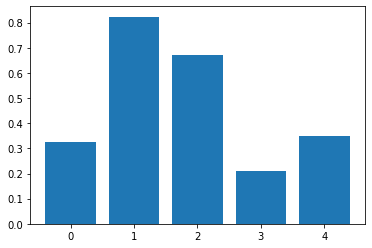

In [119]:
plt.bar(x=report_df.index[:5], height= report_df['f1-score'][:5])

In [99]:
lr_tf_idf = lr.fit(train_features_tfidf, train_labels)
y_pred = lr_tf_idf.predict(test_features_tfidf)
evaluation_summary('LR-TF-IDF', y_pred,test_labels)

Evaluation for: LR-TF-IDF
              precision    recall  f1-score   support

           0      0.089     0.625     0.155        40
           1      0.944     0.738     0.828      3213
           2      0.516     0.758     0.614       751
           3      0.000     0.000     0.000         0
           4      0.105     0.750     0.184        12

    accuracy                          0.741      4016
   macro avg      0.331     0.574     0.356      4016
weighted avg      0.853     0.741     0.780      4016


Confusion matrix:
 [[  25  249    8    0    0]
 [  11 2372  130    0    1]
 [   0  531  569    0    2]
 [   4   28    0    0    0]
 [   0   33   44    0    9]]


Naive Bayes Classifier

In [101]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb_model = nb.fit(train_features,train_labels)
y_pred = nb_model.predict(test_features)
evaluation_summary('NB-one hot', y_pred,test_labels)

Evaluation for: NB-one hot
              precision    recall  f1-score   support

           0      0.014     0.364     0.027        11
           1      0.924     0.698     0.795      3329
           2      0.382     0.625     0.474       674
           3      0.000     0.000     0.000         0
           4      0.000     0.000     0.000         2

    accuracy                          0.684      4016
   macro avg      0.264     0.337     0.259      4016
weighted avg      0.830     0.684     0.738      4016


Confusion matrix:
 [[   4  265   13    0    0]
 [   5 2322  185    0    2]
 [   1  680  421    0    0]
 [   1   31    0    0    0]
 [   0   31   55    0    0]]


SVC Classifier with One-Hot Vectorization

In [100]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc_model = svc.fit(train_features,train_labels)
y_pred = svc_model.predict(test_features)
evaluation_summary('SVC-one hot', y_pred,test_labels)

Evaluation for: SVC-one hot
              precision    recall  f1-score   support

           0      0.014     0.800     0.028         5
           1      0.959     0.721     0.823      3342
           2      0.468     0.771     0.583       669
           3      0.000     0.000     0.000         0
           4      0.000     0.000     0.000         0

    accuracy                          0.730      4016
   macro avg      0.288     0.458     0.287      4016
weighted avg      0.876     0.730     0.782      4016


Confusion matrix:
 [[   4  270    8    0    0]
 [   0 2410  104    0    0]
 [   0  586  516    0    0]
 [   1   31    0    0    0]
 [   0   45   41    0    0]]


Creating a pipeline

In [61]:
#Base Line model

from sklearn.pipeline import Pipeline

prediction_pipeline = Pipeline([
              ('Tf-idf', TfidfVectorizer(tokenizer=tokenize_normalize)),
              ('logreg', LogisticRegression(solver='saga', max_iter=8000))
              ])
prediction_pipeline.fit(train_data['body'], train_labels)
val_pred = prediction_pipeline.predict(validation_data['body'])
#val_pred = prediction_pipeline.predict(validation_features_tfidf)
evaluation_summary('LR-Tf-idf pipeline', val_pred,validation_labels)

Evaluation for: LR-Tf-idf pipeline
              precision    recall  f1-score   support

           0      0.088     0.633     0.155        30
           1      0.933     0.732     0.820      2499
           2      0.478     0.708     0.571       571
           3      0.000     0.000     0.000         0
           4      0.096     0.778     0.171         9

    accuracy                          0.727      3109
   macro avg      0.319     0.570     0.343      3109
weighted avg      0.839     0.727     0.766      3109


Confusion matrix:
 [[  19  192    4    0    0]
 [   9 1829  122    0    1]
 [   0  440  404    0    1]
 [   2   13    0    0    0]
 [   0   25   41    0    7]]


Parameter Tuning

In [142]:
from sklearn.model_selection import GridSearchCV

params = {
    'Tf-idf__sublinear_tf':(True,False),
    'Tf-idf__max_features': [1000,3000,4000,5000],
    'logreg__C': [0.1,1,5,10],
    
}

In [143]:
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=1, verbose=1, scoring='f1_macro', cv=2)
grid_search.fit(train_data['body'], train_labels)


Fitting 2 folds for each of 216 candidates, totalling 432 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Tf-idf',
                                        TfidfVectorizer(max_features=3000,
                                                        sublinear_tf=True,
                                                        tokenizer=<function tokenize_normalize at 0x7efbe0aa65f0>)),
                                       ('logreg',
                                        LogisticRegression(C=10, max_iter=8000,
                                                           solver='saga'))]),
             n_jobs=1,
             param_grid={'Tf-idf__max_features': [None, 500, 1000, 3000, 5000,
                                                  10000],
                         'Tf-idf__smooth_idf': (True, False),
                         'Tf-idf__sublinear_tf': (True, False),
                         'logreg__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05])},
             scoring='accuracy', verbose=1)

In [144]:
grid_search.best_params_

{'Tf-idf__max_features': 3000,
 'Tf-idf__smooth_idf': False,
 'Tf-idf__sublinear_tf': False,
 'logreg__C': 10.0}

In [148]:
prediction_pipeline = Pipeline([
              ('Tf-idf', TfidfVectorizer(tokenizer=tokenize_normalize,max_features=3000, sublinear_tf=False, smooth_idf=False)),
              ('logreg', LogisticRegression(solver='saga', max_iter=8000,C=10))
              ])
prediction_pipeline.fit(train_data['body'], train_labels)
val_pred = prediction_pipeline.predict(test_data['body'])

evaluation_summary('LR-Tf-idf Hyper', val_pred,test_labels)

Evaluation for: LR-Tf-idf Hyper
              precision    recall  f1-score   support

           0      0.301     0.582     0.397       146
           1      0.893     0.797     0.842      2818
           2      0.673     0.743     0.706       999
           3      0.156     0.833     0.263         6
           4      0.291     0.532     0.376        47

    accuracy                          0.773      4016
   macro avg      0.463     0.697     0.517      4016
weighted avg      0.809     0.773     0.786      4016


Confusion matrix:
 [[  85  189    6    1    1]
 [  49 2246  208    0   11]
 [   1  349  742    0   10]
 [  11   16    0    5    0]
 [   0   18   43    0   25]]


In [ ]:
np.logspace(-3,5,9)